## Real Estate Cost Predictor

In [2]:
import pandas as pd

In [3]:
housing = pd.read_csv("Mumbai_2022.csv")

In [4]:
housing.head()

location  area  bhk     price
0      Malad East   469    1  10100000
1  Ambernath West   459    1   2999000
2   Borivali West  1751    4  43800000
3    Andheri East  1076    3  31900000
4  Ambernath East   485    1   3399000

In [5]:
housing.shape

(4000, 4)

In [6]:
housing["location"].value_counts()

Mira Road East    370
Thane West        354
Andheri West      330
Dombivali         158
Kharghar          136
                 ... 
Navade              1
Owale               1
Napeansea Road      1
matunga east        1
Atgaon              1
Name: location, Length: 170, dtype: int64

In [7]:
housing["bhk"].value_counts()

1    1896
2    1507
3     478
4     101
5      13
6       5
Name: bhk, dtype: int64

In [8]:
housing["price"].value_counts()

2000000     270
11000000     44
4500000      44
17500000     41
2500000      39
           ... 
2460000       1
53000000      1
3360000       1
1250000       1
20200000      1
Name: price, Length: 809, dtype: int64

In [9]:
housing.isna().sum()

location    0
area        0
bhk         0
price       0
dtype: int64

In [10]:
housing.describe()

area          bhk         price
count  4000.000000  4000.000000  4.000000e+03
mean    841.170750     1.710750  1.324555e+07
std     490.021753     0.812557  2.197103e+07
min     220.000000     1.000000  5.500000e+05
25%     584.750000     1.000000  3.700000e+06
50%     697.000000     2.000000  7.500000e+06
75%     985.000000     2.000000  1.470000e+07
max    9500.000000     6.000000  5.800000e+08

In [11]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  4000 non-null   object
 1   area      4000 non-null   int64 
 2   bhk       4000 non-null   int64 
 3   price     4000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 125.1+ KB


## Plotting the data

In [12]:
%matplotlib inline

array([[<AxesSubplot: xlabel='area', ylabel='area'>,
        <AxesSubplot: xlabel='bhk', ylabel='area'>,
        <AxesSubplot: xlabel='price', ylabel='area'>],
       [<AxesSubplot: xlabel='area', ylabel='bhk'>,
        <AxesSubplot: xlabel='bhk', ylabel='bhk'>,
        <AxesSubplot: xlabel='price', ylabel='bhk'>],
       [<AxesSubplot: xlabel='area', ylabel='price'>,
        <AxesSubplot: xlabel='bhk', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>]], dtype=object)

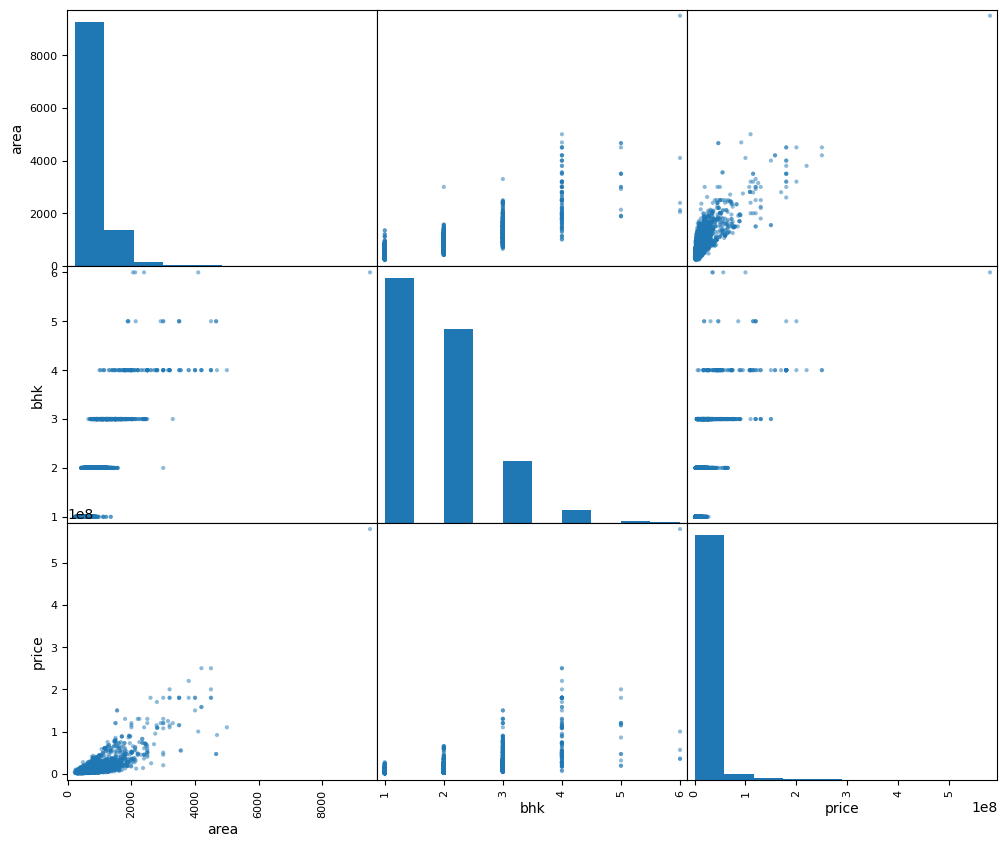

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing, figsize=(12,10))

In [14]:
dummies = pd.get_dummies(housing.location)
dummies.head()

Agripada  Airoli  Ambernath East  Ambernath West  Ambivali  Andheri East  \
0         0       0               0               0         0             0   
1         0       0               0               1         0             0   
2         0       0               0               0         0             0   
3         0       0               0               0         0             1   
4         0       0               1               0         0             0   

   Andheri West  Anjurdive  Atgaon  Badlapur East  ...  Ville Parle West  \
0             0          0       0              0  ...                 0   
1             0          0       0              0  ...                 0   
2             0          0       0              0  ...                 0   
3             0          0       0              0  ...                 0   
4             0          0       0              0  ...                 0   

   Virar  Virar East  Virar West  Vishnu Nagar  Wada  Wadala  Worli  \
0      0           0           0             0     0       0      0   
1      0           0           0             0     0       0      0   
2      0           0           0             0     0       0      0   
3      0           0           0             0     0       0      0   
4      0           0           0             0     0       0      0   

   kasaradavali thane west  matunga east  
0                        0             0  
1                        0             0  
2                        0             0  
3                        0             0  
4                        0             0  

[5 rows x 170 columns]

In [15]:
housing = pd.concat([housing,dummies],axis='columns')
housing.head()

location  area  bhk     price  Agripada  Airoli  Ambernath East  \
0      Malad East   469    1  10100000         0       0               0   
1  Ambernath West   459    1   2999000         0       0               0   
2   Borivali West  1751    4  43800000         0       0               0   
3    Andheri East  1076    3  31900000         0       0               0   
4  Ambernath East   485    1   3399000         0       0               1   

   Ambernath West  Ambivali  Andheri East  ...  Ville Parle West  Virar  \
0               0         0             0  ...                 0      0   
1               1         0             0  ...                 0      0   
2               0         0             0  ...                 0      0   
3               0         0             1  ...                 0      0   
4               0         0             0  ...                 0      0   

   Virar East  Virar West  Vishnu Nagar  Wada  Wadala  Worli  \
0           0           0             0     0       0      0   
1           0           0             0     0       0      0   
2           0           0             0     0       0      0   
3           0           0             0     0       0      0   
4           0           0             0     0       0      0   

   kasaradavali thane west  matunga east  
0                        0             0  
1                        0             0  
2                        0             0  
3                        0             0  
4                        0             0  

[5 rows x 174 columns]

In [16]:
housing.drop('location',axis='columns',inplace=True)
housing.head()

area  bhk     price  Agripada  Airoli  Ambernath East  Ambernath West  \
0   469    1  10100000         0       0               0               0   
1   459    1   2999000         0       0               0               1   
2  1751    4  43800000         0       0               0               0   
3  1076    3  31900000         0       0               0               0   
4   485    1   3399000         0       0               1               0   

   Ambivali  Andheri East  Andheri West  ...  Ville Parle West  Virar  \
0         0             0             0  ...                 0      0   
1         0             0             0  ...                 0      0   
2         0             0             0  ...                 0      0   
3         0             1             0  ...                 0      0   
4         0             0             0  ...                 0      0   

   Virar East  Virar West  Vishnu Nagar  Wada  Wadala  Worli  \
0           0           0             0     0       0      0   
1           0           0             0     0       0      0   
2           0           0             0     0       0      0   
3           0           0             0     0       0      0   
4           0           0             0     0       0      0   

   kasaradavali thane west  matunga east  
0                        0             0  
1                        0             0  
2                        0             0  
3                        0             0  
4                        0             0  

[5 rows x 173 columns]

In [17]:
x = housing.drop('price',axis=1)
y = housing['price']

In [18]:
x.shape

(4000, 172)

In [19]:
y.shape

(4000,)

## Splitting Train-Test Data

In [20]:
# train_set, test_set = split_train_test(housing, 0.2)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [22]:
print(f"No. of values in:\nX_train: {len(X_train)} , X_test {len(X_test)}\ny_train: {len(y_train)} , y_test {len(y_test)}")

No. of values in:
X_train: 3200 , X_test 800
y_train: 3200 , y_test 800


In [23]:
print(X_train.shape)
print(X_test.shape)

(3200, 172)
(800, 172)


## Applying Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [25]:
lr = LinearRegression()
lr.fit(X_train.values,y_train.values)
lr.score(X_test,y_test)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-298145551958317.25

In [26]:
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.7901421068835554

In [27]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train.values, y_train.values)
lasso_reg.score(X_test, y_test)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+16, tolerance: 1.226e+14
  model = cd_fast.enet_coordinate_descent(
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


0.7896030452967426

In [28]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg.score(X_test, y_test)

0.6760970613265711

In [29]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg.score(X_test, y_test)

0.615196347378267

In [30]:
pred = ridge_reg.predict(X_test)
pred

array([ 3.61405667e+05,  3.01499034e+06,  3.56519464e+06,  5.04747459e+07,
        5.22169960e+06,  1.31860800e+07,  8.18897639e+07,  8.96696652e+06,
        1.28856609e+07,  6.83822798e+06,  2.68533336e+07,  1.41714469e+07,
        6.83822798e+06,  1.00798808e+07,  9.44292411e+06,  2.30788202e+07,
        6.83822798e+06,  2.71596770e+07, -2.80458525e+05,  3.28982729e+06,
        5.68525465e+06,  4.06783043e+06, -8.23081473e+05,  1.41714469e+07,
       -1.38721917e+06,  1.01261205e+07,  1.86928041e+07,  9.38818732e+05,
        5.95229168e+06,  2.26805309e+07,  6.90682111e+06,  2.49870076e+06,
       -1.77525483e+06,  7.41167883e+06,  7.05388319e+07,  1.17011707e+07,
        6.83822798e+06,  9.28060901e+06,  1.01073859e+07, -8.79387192e+05,
        2.42222225e+07,  1.67799822e+07,  1.14974881e+07,  1.98241461e+06,
        1.26979245e+07,  1.37325106e+06,  1.25540227e+07,  9.71521438e+06,
       -2.84224483e+06,  1.63933987e+07,  6.83822798e+06,  6.01409890e+06,
        6.83822798e+06,  

In [31]:
y_test

555      1740000
3491     2450000
527      4000000
3925    58400000
2989    10500000
          ...   
1922     4120000
865      2000000
3943    77200000
1642    36000000
2483    29000000
Name: price, Length: 800, dtype: int64

In [32]:
import numpy as np
def predict_price(location,area,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    X = np.zeros(len(x.columns))
    X[0] = area
    X[1] = bhk
    if loc_index >= 0:
        X[loc_index] = 1

    return ridge_reg.predict([X])[0]

In [33]:
predict_price("Borivali West",459,1)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


10249163.024338473

In [34]:
predict_price("Thane West",1000,2)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


15519300.44820967

In [35]:
predict_price("Dombivali",700,1)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


1816319.8356902814

In [36]:
predict_price("Mira Road East",800,2)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


6370721.502279872

In [37]:
predict_price("Thane East", 500,1)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


7975047.994849224

In [38]:
import joblib
joblib.dump(lr, "Mumbai house price prediction model.pkl")

['Mumbai house price prediction model.pkl']